In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import unicodedata
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
import nltk
nltk.download('stopwords')
st_words= set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHRUTI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df_training=pd.read_csv("C:/Users/SHRUTI/OneDrive/Desktop/MLT DATASETS/training.csv", encoding='latin-1')


In [5]:
df_training.head()

,ï»¿tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,2.630000e+17,ÃÂ¿Se acuerdan de la pelÃÂ­cula: Ã¢â¬ÅEl d...,21226711.0,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,2.630000e+17,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571.0,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,2.630000e+17,"Buena la foto del HuracÃÂ¡n Sandy, me recuerd...",132303095.0,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,2.630000e+17,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902.0,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,2.630000e+17,My fave place in the world #nyc #hurricane #sa...,250315890.0,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [6]:
df_testing=pd.read_csv("C:/Users/SHRUTI/OneDrive/Desktop/MLT DATASETS/testing.csv", encoding='latin-1')

In [7]:
df_testing

,ï»¿tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,5.788550e+17,kereeen RT @Shyman33: Eclipse from ISS.... htt...,7.082497e+07,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,5.788750e+17,Absolutely beautiful! RT @Shyman33: Eclipse fr...,3.447070e+08,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,5.788910e+17,Ã¢â¬Å@Shyman33: Eclipse from ISS.... http://...,2.248396e+08,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,5.788470e+17,Eclipse from ISS.... http://t.co/En87OtvsU6,1.345431e+08,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,5.789750e+17,@ebonfigli: Ãâ°clipse vue de l'ISS... Autre ...,1.150729e+09,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake
...,...,...,...,...,...,...,...
3776,5.784330e+17,Un prÃÂ©sentateur de la ZDF confesse avoir tr...,2.575512e+08,varoufakis_1,Cdt_Sylvestre,Thu Mar 19 05:49:44 +0000 2015,fake
3777,5.784340e+17,"Oh les kleine menteurs ""@CorineBarella: Un prÃ...",2.757588e+07,varoufakis_1,damomarc,Thu Mar 19 05:51:42 +0000 2015,fake
3778,5.784870e+17,Este es el programa de ZDF en el que confirman...,2.049211e+06,varoufakis_1,javierpascual,Thu Mar 19 09:23:21 +0000 2015,fake
3779,5.785050e+17,11.34 - wir haben FAST Mittag Ã¢âÂ¶ Riesen V...,2.622224e+08,varoufakis_1,aotto1968_2,Thu Mar 19 10:35:20 +0000 2015,fake


In [8]:
df_testing.shape

(3781, 7)

In [9]:
df_training.shape

(14483, 7)

In [10]:
df_training['label'] = df_training['label'].map({'fake':0, 'real':1})

In [11]:
df_testing['label'] = df_testing['label'].map({'fake':0, 'real':1})

In [12]:
df_training.head()

,ï»¿tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,2.630000e+17,ÃÂ¿Se acuerdan de la pelÃÂ­cula: Ã¢â¬ÅEl d...,21226711.0,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,0.0
1,2.630000e+17,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571.0,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,0.0
2,2.630000e+17,"Buena la foto del HuracÃÂ¡n Sandy, me recuerd...",132303095.0,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,0.0
3,2.630000e+17,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902.0,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,0.0
4,2.630000e+17,My fave place in the world #nyc #hurricane #sa...,250315890.0,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,0.0


In [13]:
df_testing.head()

,ï»¿tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,5.788550e+17,kereeen RT @Shyman33: Eclipse from ISS.... htt...,7.082497e+07,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,0.0
1,5.788750e+17,Absolutely beautiful! RT @Shyman33: Eclipse fr...,3.447070e+08,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,0.0
2,5.788910e+17,Ã¢â¬Å@Shyman33: Eclipse from ISS.... http://...,2.248396e+08,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,0.0
3,5.788470e+17,Eclipse from ISS.... http://t.co/En87OtvsU6,1.345431e+08,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,0.0
4,5.789750e+17,@ebonfigli: Ãâ°clipse vue de l'ISS... Autre ...,1.150729e+09,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,0.0


In [14]:
df_training.isna().sum()

ï»¿tweetId       0
tweetText        0
userId          15
imageId(s)      15
username        15
timestamp       15
label         2646
dtype: int64

In [15]:
df_testing.isna().sum()

ï»¿tweetId    0
tweetText     0
userId        4
imageId(s)    4
username      4
timestamp     4
label         4
dtype: int64

In [16]:
df_training.dropna(inplace=True)
df_testing.dropna(inplace=True)

<AxesSubplot:xlabel='label', ylabel='count'>

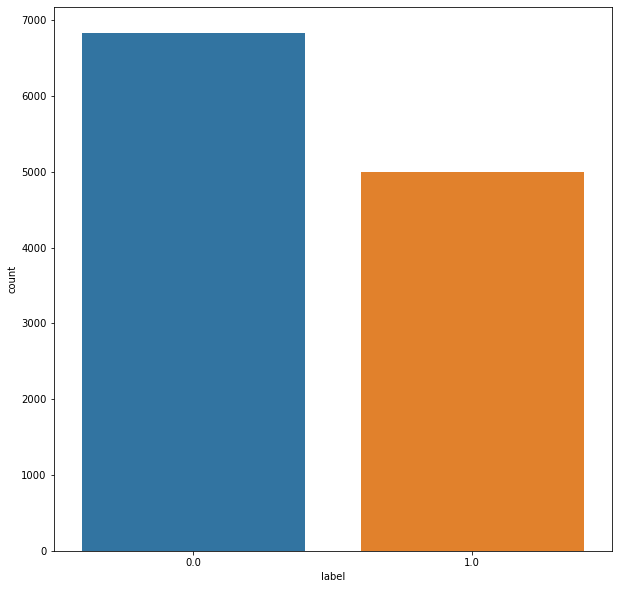

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(df_training['label'])

In [18]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11837 entries, 0 to 14482
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ï»¿tweetId  11837 non-null  float64
 1   tweetText   11837 non-null  object 
 2   userId      11837 non-null  float64
 3   imageId(s)  11837 non-null  object 
 4   username    11837 non-null  object 
 5   timestamp   11837 non-null  object 
 6   label       11837 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.0+ MB


In [19]:
df_training.drop(['userId', 'imageId(s)','username', 'timestamp'], axis=1, inplace=True)


In [20]:
df_testing.drop(['userId', 'imageId(s)','username', 'timestamp'], axis=1, inplace=True)


In [21]:
df_training.head(5)

,ï»¿tweetId,tweetText,label
0,2.630000e+17,ÃÂ¿Se acuerdan de la pelÃÂ­cula: Ã¢â¬ÅEl d...,0.0
1,2.630000e+17,@milenagimon: Miren a Sandy en NY! Tremenda i...,0.0
2,2.630000e+17,"Buena la foto del HuracÃÂ¡n Sandy, me recuerd...",0.0
3,2.630000e+17,Scary shit #hurricane #NY http://t.co/e4JLBUfH,0.0
4,2.630000e+17,My fave place in the world #nyc #hurricane #sa...,0.0


In [22]:
df_testing.head(5)

,ï»¿tweetId,tweetText,label
0,5.788550e+17,kereeen RT @Shyman33: Eclipse from ISS.... htt...,0.0
1,5.788750e+17,Absolutely beautiful! RT @Shyman33: Eclipse fr...,0.0
2,5.788910e+17,Ã¢â¬Å@Shyman33: Eclipse from ISS.... http://...,0.0
3,5.788470e+17,Eclipse from ISS.... http://t.co/En87OtvsU6,0.0
4,5.789750e+17,@ebonfigli: Ãâ°clipse vue de l'ISS... Autre ...,0.0


In [23]:
def prep_tweet(tweet):
    tweet=tweet.lower() #casing
    
    tweet=re.sub(r"https\S+|www\S+|https\S+"," ", tweet, flags=re.MULTILINE) #remove any urls
    tweet=tweet.translate(str.maketrans(" "," ",string.punctuation)) #remove any punctuations
    tweet=re.sub(r'\@\w+|\#'," ", tweet) #remove @ #
    
    #remove accented characters
    tweet=unicodedata.normalize('NFKD', tweet).encode('ascii','ignore').decode('utf-8','ignore')
    
    #remove stopwords
    tweet_tokens= word_tokenize(tweet)
    filtered_words=[word for word in tweet_tokens if word not in st_words]
    
    
    #stemming using porterstemmer
    pstem=PorterStemmer()
    stemmed_words=[pstem.stem(w) for w in filtered_words]
    
    #lemmatizing
    lemm = WordNetLemmatizer()
    lem_words=[lemm.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(lem_words)
    


In [24]:
df_training["tweetText"]=df_training["tweetText"].apply(prep_tweet)

In [25]:
df_testing["tweetText"]=df_testing["tweetText"].apply(prep_tweet)

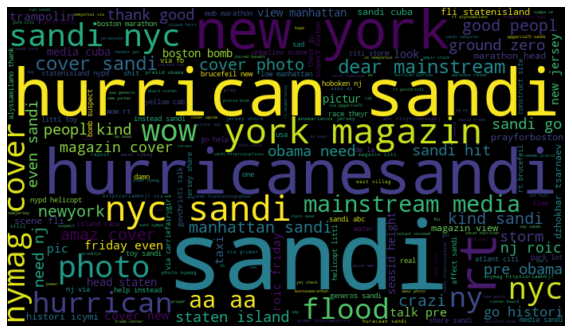

In [26]:
#wordclouds for real tweets
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
aWrds= ' '.join([tweets for tweets in df_training['tweetText']])
wordCloud=WordCloud(width = 700, height=400, random_state= 21, max_font_size=119).generate(" ".join(df_training[df_training.label==1].tweetText))
                                                                                           
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

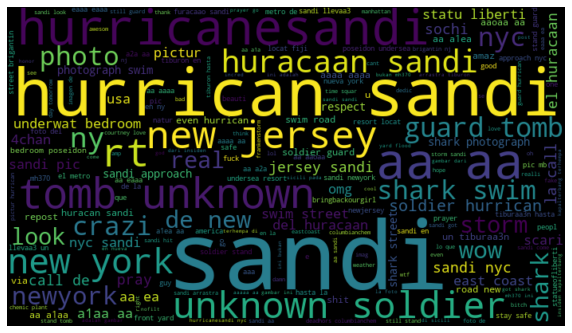

In [27]:
#wordclouds for fake tweets
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
aWrds= ' '.join([tweets for tweets in df_training['tweetText']])
wordCloud=WordCloud(width = 700, height=400, random_state= 21, max_font_size=119).generate(" ".join(df_training[df_training.label==0].tweetText))
                                                                                           
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [28]:
#wordcloud using another technique do will do it later


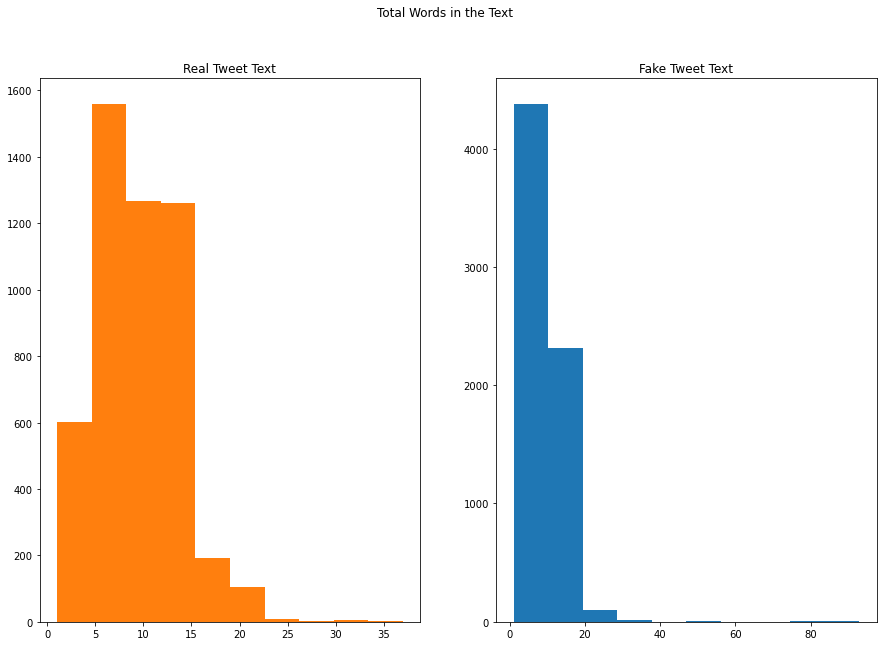

In [29]:
#finding out no of words in a tweet real and fake
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10))
text_len=df_training[df_training['label']== 1]['tweetText'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color='tab:orange')
ax1.set_title('Real Tweet Text')
text_len=df_training[df_training['label']== 0]['tweetText'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color='tab:blue')
ax2.set_title('Fake Tweet Text')
fig.suptitle('Total Words in the Text')
plt.show()

In [30]:
#there are some differences that can be observed from this figure

In [31]:
#using count vectorizer and tfidf vectorizer
#creating x and y train and test
X_train=df_training["tweetText"]
Y_train=df_training["label"]
X_test=df_testing["tweetText"]
Y_test=df_testing["label"]



In [32]:
#using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(min_df=0, max_df=1, binary=True,ngram_range=(1,1))
countvec_train=count_vec.fit_transform(X_train)
countvec_test=count_vec.transform(X_test)

In [33]:
vectorizer= TfidfVectorizer(min_df=0, max_df=1, use_idf=True,ngram_range=(1,1))
X1_train=vectorizer.fit_transform(X_train)
X1_test=vectorizer.transform(X_test)

In [34]:
countvec_train.shape
countvec_test.shape

(3777, 16648)

In [35]:
X1_train.shape
X1_test.shape

(3777, 16648)

In [ ]:
#USING COUNT VECTORIZERS

In [36]:
#logistic regression using count vec
model=LogisticRegression()
model.fit(countvec_train,Y_train,)

LogisticRegression()

In [37]:
#pred using count vec
predLR_CV=model.predict(countvec_test)

In [38]:
#accuracy cv
print(accuracy_score(Y_test,predLR_CV))

0.8745035742652899


In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predLR_CV))


              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2562
         1.0       0.91      0.67      0.78      1215

    accuracy                           0.87      3777
   macro avg       0.89      0.82      0.84      3777
weighted avg       0.88      0.87      0.87      3777



In [40]:
#using multino nb
from sklearn import naive_bayes
model_nb_cv=naive_bayes.MultinomialNB()
model_nb_cv.fit(countvec_train,Y_train)

MultinomialNB()

In [41]:
predNB_CV=model_nb_cv.predict(countvec_test)

In [42]:
print(accuracy_score(Y_test,predNB_CV))

0.8504103786073604


In [43]:
print(classification_report(Y_test,predNB_CV))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      2562
         1.0       0.82      0.69      0.75      1215

    accuracy                           0.85      3777
   macro avg       0.84      0.81      0.82      3777
weighted avg       0.85      0.85      0.85      3777



In [44]:
#using gb using cv
from sklearn.ensemble import GradientBoostingClassifier
GBC_cv=GradientBoostingClassifier(random_state=0)
GBC_cv.fit(countvec_train,Y_train)

GradientBoostingClassifier(random_state=0)

In [45]:
predGbc_cv=GBC_cv.predict(countvec_test)

In [46]:
print(accuracy_score(Y_test,predGbc_cv))

0.6783161239078633


In [47]:
print(classification_report(Y_test,predGbc_cv))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81      2562
         1.0       0.00      0.00      0.00      1215

    accuracy                           0.68      3777
   macro avg       0.34      0.50      0.40      3777
weighted avg       0.46      0.68      0.55      3777



In [59]:
from sklearn import svm
svm_class_cv=svm.SVC(kernel='linear', gamma='auto', C=1)
svm_class_cv.fit(countvec_train,Y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [60]:
predSVM_cv=svm_class_cv.predict(countvec_test)

In [61]:
print(accuracy_score(Y_test,predSVM_cv))

0.8570293884034949


In [62]:
print(classification_report(Y_test,predSVM_cv))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2562
         1.0       0.85      0.68      0.75      1215

    accuracy                           0.86      3777
   macro avg       0.85      0.81      0.83      3777
weighted avg       0.86      0.86      0.85      3777



In [63]:
#USING TF-IDF VECTORIZER

In [64]:
model_lr=LogisticRegression()
model_lr.fit(X1_train,Y_train,)

LogisticRegression()

In [65]:
predLR1=model_lr.predict(X1_test)

In [66]:
print(accuracy_score(Y_test,predLR1))

0.6716971141117288


In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predLR1))


              precision    recall  f1-score   support

         0.0       0.68      0.98      0.80      2562
         1.0       0.30      0.01      0.03      1215

    accuracy                           0.67      3777
   macro avg       0.49      0.50      0.42      3777
weighted avg       0.55      0.67      0.55      3777



In [68]:
from sklearn import naive_bayes
model1=naive_bayes.MultinomialNB()
model1.fit(X1_train,Y_train)

MultinomialNB()

In [69]:
predNB=model1.predict(X1_test)

In [70]:
print(accuracy_score(Y_test,predNB))

0.8527932221339688


In [71]:
print(classification_report(Y_test,predNB))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2562
         1.0       0.83      0.68      0.75      1215

    accuracy                           0.85      3777
   macro avg       0.85      0.81      0.82      3777
weighted avg       0.85      0.85      0.85      3777



In [72]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=0)
GBC.fit(X1_train,Y_train)

GradientBoostingClassifier(random_state=0)

In [73]:
predGbc=GBC.predict(X1_test)

In [74]:
print(accuracy_score(Y_test,predGbc))

0.6783161239078633


In [75]:
print(classification_report(Y_test,predGbc))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81      2562
         1.0       0.00      0.00      0.00      1215

    accuracy                           0.68      3777
   macro avg       0.34      0.50      0.40      3777
weighted avg       0.46      0.68      0.55      3777



In [84]:
svm_class=svm.SVC(kernel='linear', gamma='auto', C=1)
svm_class.fit(X1_train,Y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [85]:
predSVM=svm_class.predict(X1_test)

In [86]:
print(accuracy_score(Y_test,predSVM))

0.8697378872120731


In [87]:
print(classification_report(Y_test,predSVM))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2562
         1.0       0.89      0.68      0.77      1215

    accuracy                           0.87      3777
   macro avg       0.88      0.82      0.84      3777
weighted avg       0.87      0.87      0.86      3777



In [113]:
#using count vectorizer logistic regression gives the best result and using tf-idf vectorizer svm using linear kernel gives
#better results

In [114]:
#trying using Bi-lstms
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM,GRU, Embedding, Dropout
from keras.layers import GlobalMaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [115]:
tokenizer=Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(df_training['tweetText'].values)

X_train=tokenizer.texts_to_sequences(df_training['tweetText'].values)
X_train=pad_sequences(X_train,maxlen=30)
#X_train[:5]

XTest = tokenizer.texts_to_sequences(df_testing['tweetText'].values)
XTest = pad_sequences(XTest, maxlen=30)

In [116]:
X_train.shape, XTest.shape

((11837, 30), (3777, 30))

In [128]:
Model = Sequential()
Model.add(Embedding(5000,256, input_length=X_train.shape[1]))
Model.add(LSTM(100))
Model.add(Dense(2, activation='softmax'))
Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 256)           1280000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 1,423,002
Trainable params: 1,423,002
Non-trainable params: 0
_________________________________________________________________


In [129]:
y_train=pd.get_dummies(df_training['label']).values
y_test=pd.get_dummies(df_testing['label']).values

In [130]:
y_train.shape, y_test.shape

((11837, 2), (3777, 2))

In [131]:
batch_size=32
epochs=6
Model.fit(X_train,y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/6
370/370 - 25s - loss: 0.3145 - accuracy: 0.8550
Epoch 2/6
370/370 - 14s - loss: 0.1716 - accuracy: 0.9262
Epoch 3/6
370/370 - 15s - loss: 0.1345 - accuracy: 0.9415
Epoch 4/6
370/370 - 13s - loss: 0.1117 - accuracy: 0.9515
Epoch 5/6
370/370 - 12s - loss: 0.0972 - accuracy: 0.9565
Epoch 6/6
370/370 - 12s - loss: 0.0877 - accuracy: 0.9612


In [132]:
Model.evaluate(XTest,y_test)


119/119 [==============================] - 3s 18ms/step - loss: 1.0826 - accuracy: 0.7953


[1.082554817199707, 0.7953402400016785]

In [134]:
Model_BiLSTM = Sequential()
Model_BiLSTM.add(Embedding(5000,256, input_length=X_train.shape[1]))
Model_BiLSTM.add(Bidirectional(LSTM(100, return_sequences=True)))
Model_BiLSTM.add(GlobalMaxPooling1D())
Model_BiLSTM.add(Dense(2, activation='softmax'))
Model_BiLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
Model_BiLSTM.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 256)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 200)           285600    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 402       
Total params: 1,566,002
Trainable params: 1,566,002
Non-trainable params: 0
_________________________________________________________________


In [135]:
batch_size=32
epochs=6
Model_BiLSTM.fit(X_train,y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/6
370/370 - 31s - loss: 0.3111 - accuracy: 0.8533
Epoch 2/6
370/370 - 22s - loss: 0.1739 - accuracy: 0.9230
Epoch 3/6
370/370 - 20s - loss: 0.1376 - accuracy: 0.9401
Epoch 4/6
370/370 - 19s - loss: 0.1147 - accuracy: 0.9492
Epoch 5/6
370/370 - 19s - loss: 0.1011 - accuracy: 0.9553
Epoch 6/6
370/370 - 18s - loss: 0.0914 - accuracy: 0.9602


In [136]:
Model_BiLSTM.evaluate(XTest,y_test)


119/119 [==============================] - 2s 9ms/step - loss: 0.5328 - accuracy: 0.8610


[0.5327622294425964, 0.8610007762908936]